In [ ]:
#|default_exp app

In [1]:
#|export
from fastai.vision.all import *
import gradio as gr

def godzilla_or_kingkong(x): return x[0].isupper

In [4]:
!pip install -Uq fastbook fastai 

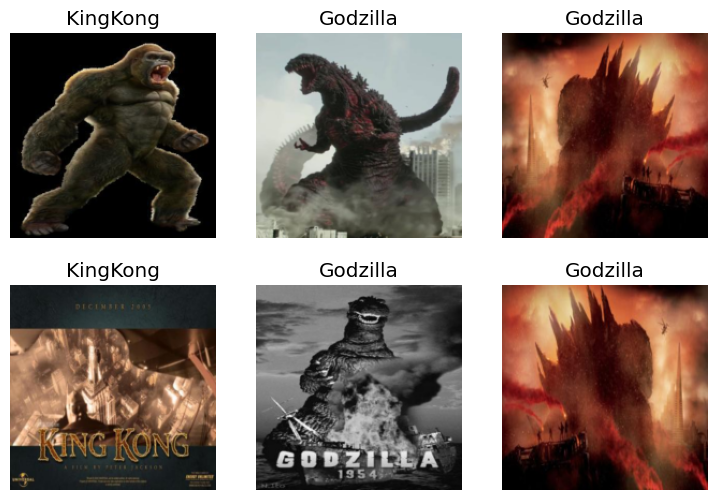

In [7]:
from fastai import *
from fastbook import *
path = '/kaggle/input/godzilla-or-kingkong'
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

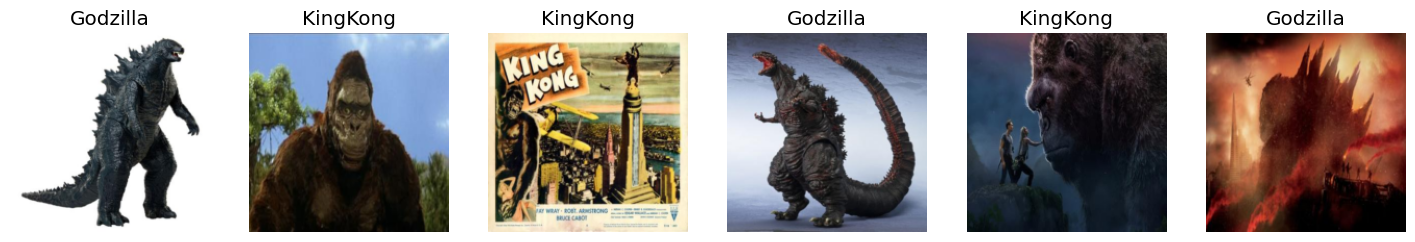

In [8]:
dls.show_batch(max_n=6, nrows=1)

In [10]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

In [11]:
learn.export('model.pkl')

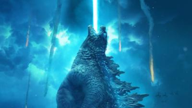

In [12]:
im = PILImage.create('/kaggle/input/godzilla-or-kingkong/Godzilla/Godzilla (1).jpeg')
im.thumbnail((192,192))
im

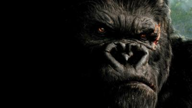

In [16]:
im2 = PILImage.create('/kaggle/input/godzilla-or-kingkong/KingKong/KingKong (10).jpg')
im2.thumbnail((192,192))
im2

In [ ]:
#|export
learn = load_learner('model.pkl')

In [13]:
learn.predict(im)

('Godzilla', tensor(0), tensor([9.9902e-01, 9.8120e-04]))

In [17]:
learn.predict(im2)

('KingKong', tensor(1), tensor([0.0048, 0.9952]))

In [18]:
#|export
categories = ['Godzilla', 'King Kong']
def classify_kaiju(img):
    pred,idx,probs=learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [19]:
classify_kaiju(im2)

{'Godzilla': 0.004830744117498398, 'King Kong': 0.9951692223548889}

In [20]:
#|export
image = gr.inputs.Image(shape=(192, 192))
label = gr.outputs.Label()
examples = ['Godzilla_1.jpg', 'KingKong_1.jpg', 'Godzilla_2.jpg', 'KingKong_2.jpg']

intf = gr.Interface(fn=classify_kaiju, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

NameError: name 'gr' is not defined

In [3]:
import nbdev
import nbdev.export
nbdev.export.nb_export('app.ipynb', 'app')
print('Export successfully!')

Export successfully!
